## Result of GAiA's neural network

In [1]:
import sys
sys.path.insert(1, "model/")
sys.path.insert(1, "lib/")
from GAiA_network import coeff_determination
from dataset_utils import encode_position, read_many_hdf5, board_shape
from ScoreGetter import ScoreGetter

import chess
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import platform
if platform.system() == "Darwin":
    %config InlineBackend.figure_format="retina"  # For high DPI display

We retrieve the model trained in the `train_model` notebook.

In [2]:
model = tf.keras.models.load_model("model/GAiA_Network.h5")

In [3]:
def plot_regression_results(model, X_test, y_test, path=None):
  preds = model.predict(X_test)
  r2_score = coeff_determination(tf.convert_to_tensor(y_test), preds).numpy()
  ma = np.max(y_test)
  mi = np.min(y_test)
  x = np.linspace(ma, mi, 100)
  plt.figure(figsize=(10,5))
  plt.plot(x, x, "r-.", label = "Predictions = True values")
  plt.scatter(y_test, preds, label = f"$R^2 = {r2_score:.2f}$")
  plt.xlabel("True values (centipawn)")
  plt.ylabel("Predictions (centipawn)")
  plt.title(f"Results of GAiA's neural network with {X_test.shape[0]} test positions")
  plt.legend()
  if path:
    plt.savefig(path)

We load our test dataset and we plot the results (finally).

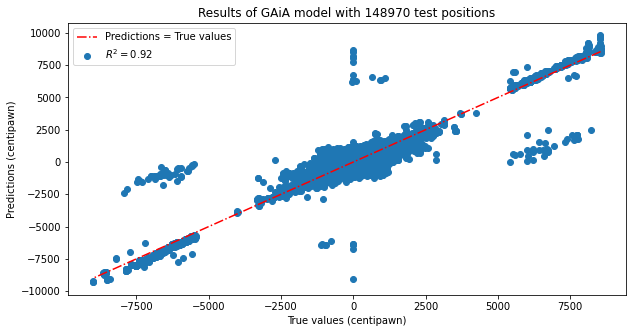

In [4]:
directory = "/media/gaetan/HDD/IA/Chess/Datasets/SE_ResNet/"
positions_test, scores_test = read_many_hdf5(148970, directory, "_test")
plot_regression_results(model, positions_test, scores_test, path="results/result.pdf")

In [5]:
def test_position (model, engine_path, fen):
  score_getter = ScoreGetter(engine_path, "eval", "go depth 1")

  print(fen)
  e = encode_position(fen).reshape((1, 8, 8, 15))
  print(f"Score of Stockfish 14: {score_getter.getScore(fen)}")
  print(f"Score of GAiA: {int(model.predict(e).flatten()[0])}")

  return chess.Board(fen)

We observe the difference between ViCTORIA and the Stockfish evaluation function on any chess position.

r1bqkb1r/pppp1ppp/2nn4/1B2N3/8/8/PPPP1PPP/RNBQR1K1 b kq - 0 6
Score of Stockfish 14: 67
Score of GAiA: 81


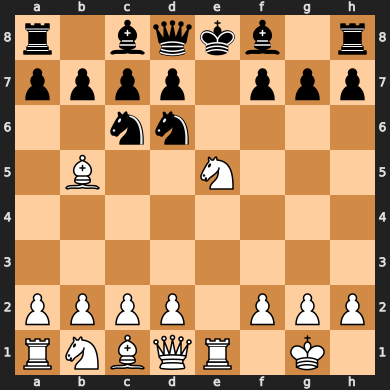

In [10]:
engine_path = "bin/stockfish.exe"
test_position(model, engine_path, "r1bqkb1r/pppp1ppp/2nn4/1B2N3/8/8/PPPP1PPP/RNBQR1K1 b kq - 0 6")